# E-Sports: Exploratory analysis of the LCS 2019 Tournament match results  
  

  

## 1. Introduction
The League Championship Series (LCS) 2019 is the annual tournament for the online game League of Legends (LoL). 

We investigate the post-game data of each match to determine whether there are any underlying factors that affect a victory or loss, and any other trends or relationships between variables. So, we base this type of analysis around exploratory analysis.

## 2. Data Collection
A LCS 2019 dataset was used from http://oracleselixir.com/match-data/, containing match data of all games during the tourney.

Also provided is a dictionary of terms used in the dataset: http://oracleselixir.com/match-data/match-data-dictionary/.  
As a result, there may be many terms and jargon, specific to this game used in this report.

## 3. Data Cleaning
We firstly observe the data from the LCS 2019 dataset.


In [1]:
import pandas as pd

In [2]:
match_data = pd.read_csv('D:/Documents folder/Data science projects/LoL/2019 Worlds analysis/2019_worlds_data.csv')

In [3]:
match_data.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,1,Blue,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,2,Blue,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,3,Blue,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,4,Blue,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,5,Blue,...,-1156,2731,2376,355,4,3,1,6,5,1


In [4]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameid                   1428 non-null   int64  
 1   url                      1428 non-null   object 
 2   league                   1428 non-null   object 
 3   split                    1428 non-null   object 
 4   date                     1428 non-null   float64
 5   week                     1428 non-null   object 
 6   game                     1428 non-null   object 
 7   patchno                  1428 non-null   float64
 8   playerid                 1428 non-null   int64  
 9   side                     1428 non-null   object 
 10  position                 1428 non-null   object 
 11  player                   1428 non-null   object 
 12  team                     1428 non-null   object 
 13  champion                 1428 non-null   object 
 14  ban1                    

All columns are non-null, which is convenient here. Each column are of correct data type too.

In [5]:
match_data['url']

0       https://matchhistory.euw.leagueoflegends.com/e...
1       https://matchhistory.euw.leagueoflegends.com/e...
2       https://matchhistory.euw.leagueoflegends.com/e...
3       https://matchhistory.euw.leagueoflegends.com/e...
4       https://matchhistory.euw.leagueoflegends.com/e...
                              ...                        
1423    http://matchhistory.na.leagueoflegends.com/en/...
1424    http://matchhistory.na.leagueoflegends.com/en/...
1425    http://matchhistory.na.leagueoflegends.com/en/...
1426    http://matchhistory.na.leagueoflegends.com/en/...
1427    http://matchhistory.na.leagueoflegends.com/en/...
Name: url, Length: 1428, dtype: object

### Deleted columns:
We remove irrelevant/unimportant columns. The column 'url' as displayed above, for example, is of no use here.  

__url__ - URL link has no use  
__league__ - all rows are 'WC' (World championship level league), so unimportant  
__split__ - all rows are '2019-W' (time period covered), so unimportant  
__date__ - the date of each game created is irrelevant  



In [6]:
match_data.drop(columns = ['url','league','split','date'])


,gameid,week,game,patchno,playerid,side,position,player,team,champion,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,...,-1156,2731,2376,355,4,3,1,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1072517,F,3,9.19,8,Red,Middle,Caps,G2 Esports,Veigar,...,-169,4711,4430,281,89,78,11,129,122,7
1424,1072517,F,3,9.19,9,Red,ADC,Perkz,G2 Esports,Ezreal,...,-1495,3194,3887,-693,71,90,-19,125,151,-26
1425,1072517,F,3,9.19,10,Red,Support,Mikyx,G2 Esports,Nautilus,...,-1004,2485,1766,719,14,3,11,23,6,17
1426,1072517,F,3,9.19,100,Blue,Team,Team,Funplus Phoenix,,...,1697,17393,17646,-253,291,310,-19,465,510,-45


In [7]:
match_data[['player','team']].head(12)

,player,team
0,Evi,DetonatioN FocusMe
1,Steal,DetonatioN FocusMe
2,Ceros,DetonatioN FocusMe
3,Yutapon,DetonatioN FocusMe
4,Gaeng,DetonatioN FocusMe
5,Vizicsacsi,Splyce
6,Xerxe,Splyce
7,Humanoid,Splyce
8,Kobbe,Splyce
9,Norskeren,Splyce


### Duplicate data

Due to the large number of columns, we focus firstly on certain aspects. As a result, we firstly look at which variables will affect a victory. From prior knowledge of the game, we can select a handful of variables to look at.  
  
However, there are 1428 rows of data, with 12 rows representing one game. The first 10 rows represents each of the 5 players data of the 2 teams, with the 11th row and the 12th row representing the data of the two teams overall. So, there are (1428/12)=119 games recorded. We can see this by looking at the column 'player' and 'team'.

Therefore, we create a new data frame of the data set containing only the overall data of each team (the 11th and 12th rows of data), to avoid duplicate rows of certain variables.

In [8]:
team_data = match_data[match_data.player.str.contains('Team')]

In [9]:
team_data[['player','team']].head(10)

,player,team
10,Team,DetonatioN FocusMe
11,Team,Splyce
22,Team,Clutch Gaming
23,Team,Unicorns of Love
34,Team,Mammoth
35,Team,Unicorns of Love
46,Team,DetonatioN FocusMe
47,Team,Isurus Gaming
58,Team,Mammoth
59,Team,Clutch Gaming


In [10]:
team_data.index

Int64Index([  10,   11,   22,   23,   34,   35,   46,   47,   58,   59,
            ...
            1378, 1379, 1390, 1391, 1402, 1403, 1414, 1415, 1426, 1427],
           dtype='int64', length=238)

We do this by only selecting rows that contain the string 'Team' in the player column (that was set default to 'team' in the player column').  
  
We see that there are (2* *number of games) = (2* *119) = 238 rows of data as required.

## 4. Data Exploration

  

The histogram below represents the game length of the 119 matches played during this tourney. So, any findings/relationships found are based on this.

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of length of games')

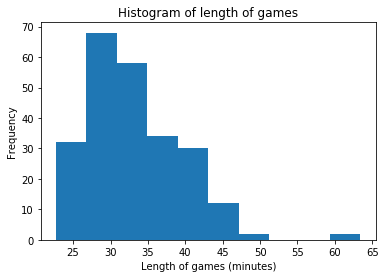

In [12]:
plt.hist(team_data['gamelength'])
plt.xlabel('Length of games (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of length of games')

We see that the majority of games are between 25 and 35 minutes, with less greater than 35 minutes, and only a few beyond 50 minutes.

To investigate the effect of factors on a victory or loss, we will plot many correlation plots.
The outcome variable is the column 'result' (1 = win, 0 = loss).  

We look at the following variables to investigate:


__Integer-type variables__:

teamkills
teamdeaths
dmgtochamps
totalgold
wpm
cspm
teamdragkills
visionwards
wardkills


__Categorical variables__:

side
fb
fd
fbaron
ft
herald


Since we are investigating the relationship between a binary categorical outcome variable and continuous variables, we use boxplots.

In [13]:
team_data_corr = team_data[['side','fb','fd','fbaron','ft','herald','result','teamkills','teamdeaths','teamdragkills','visionwards','wardkills','dmgtochamps','totalgold','wpm','cspm']]

In [14]:
team_data_corr.head()

,side,fb,fd,fbaron,ft,herald,result,teamkills,teamdeaths,teamdragkills,visionwards,wardkills,dmgtochamps,totalgold,wpm,cspm
10,Blue,0,1,0.0,0,0,0,7,22,1,37,28,37133,41227,3.919598,28.793970
11,Red,1,0,1.0,1,1,1,22,7,2,35,51,59544,56670,3.015075,33.015075
22,Blue,1,0,0.0,0,1,0,8,16,0,54,54,51747,61900,3.572680,31.313485
23,Red,0,1,1.0,1,0,1,16,8,4,35,62,73706,68625,3.546410,28.187391
34,Blue,0,1,1.0,1,1,1,18,8,4,50,78,72107,69069,3.059867,32.541020


In [15]:
import seaborn as sns

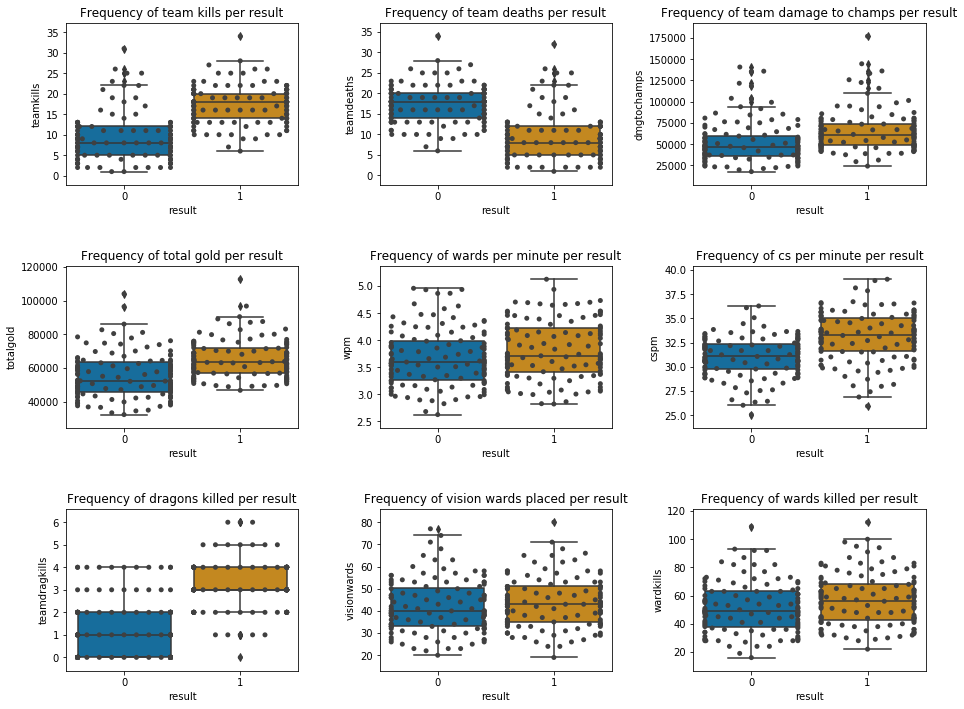

In [16]:
plt.subplot(331)
sns.boxplot(x="result", y="teamkills", data=team_data_corr, palette='colorblind')
sns.swarmplot(x="result", y="teamkills", data=team_data_corr, color=".25")
plt.title('Frequency of team kills per result')

plt.subplot(332)
sns.boxplot(x="result", y="teamdeaths", data=team_data_corr, palette='colorblind')
sns.swarmplot(x="result", y="teamdeaths", data=team_data_corr, color=".25")
plt.title('Frequency of team deaths per result')

plt.subplot(333)
sns.boxplot(x="result", y="dmgtochamps", data=team_data_corr, palette='colorblind')
sns.swarmplot(x="result", y="dmgtochamps", data=team_data_corr, color=".25")
plt.title('Frequency of team damage to champs per result')

plt.subplot(334)
sns.boxplot(x="result", y="totalgold", data=team_data_corr, palette='colorblind',)
sns.swarmplot(x="result", y="totalgold", data=team_data_corr, color=".25")
plt.title('Frequency of total gold per result')

plt.subplot(335)
sns.boxplot(x="result", y="wpm", data=team_data_corr, palette='colorblind',)
sns.swarmplot(x="result", y="wpm", data=team_data_corr, color=".25")
plt.title('Frequency of wards per minute per result')

plt.subplot(336)
sns.boxplot(x="result", y="cspm", data=team_data_corr, palette='colorblind',)
sns.swarmplot(x="result", y="cspm", data=team_data_corr, color=".25")
plt.title('Frequency of cs per minute per result')

plt.subplot(337)
sns.boxplot(x="result", y="teamdragkills", data=team_data_corr, palette='colorblind',)
sns.swarmplot(x="result", y="teamdragkills", data=team_data_corr, color=".25")
plt.title('Frequency of dragons killed per result')

plt.subplot(338)
sns.boxplot(x="result", y="visionwards", data=team_data_corr, palette='colorblind',)
sns.swarmplot(x="result", y="visionwards", data=team_data_corr, color=".25")
plt.title('Frequency of vision wards placed per result')

plt.subplot(339)
sns.boxplot(x="result", y="wardkills", data=team_data_corr, palette='colorblind',)
sns.swarmplot(x="result", y="wardkills", data=team_data_corr, color=".25")
plt.title('Frequency of wards killed per result')

plt.subplots_adjust(top=2.5, bottom=0.25, left=0.01, right=2, hspace=0.5, wspace=0.35)

From these boxplots, we are able to grasp the distribution of the data points.  
  
Firstly, there appears to be some outliers in many boxplot diagrams. However, it is not a good choice to remove these outliers since these data points are unlikely to be incorrect data points. Due to the nature of the data, it is likely that any outliers are just data points from the extremity case of matches. This case is different to outliers where the data are measurements of some unit, and were incorrectly measured, for example.  
  
Generally, the boxplots show distributions of data that we are likely to expect. For instance, having a larger number of team gold or team kills increases the chance of victory. Many of these plots are like this, but the team kills (and team deaths) variable seems to have the most impact so far (out of the 9 variables we are looking at). This is due to the median of one boxplot passing the upper/lower quartile range of the other.  
  
Another interesting result is how some variables do not seem to affect a win or loss, despite it seeming likely to affect it. This is the case with wpm, visionwards and wardkills. One reason for the absence of a relationship is due to those factors being fairly weak, when compared to factors such as team kills. From the boxplot, it seems as though both teams will have a similar frequency of the variable, and hence, not affect the result of a win or loss much. The lower frequency data points are likely to just be matches which are of short length.

And for categorical variables, we use countplots.  
Let "W/L" = "Win/Loss"

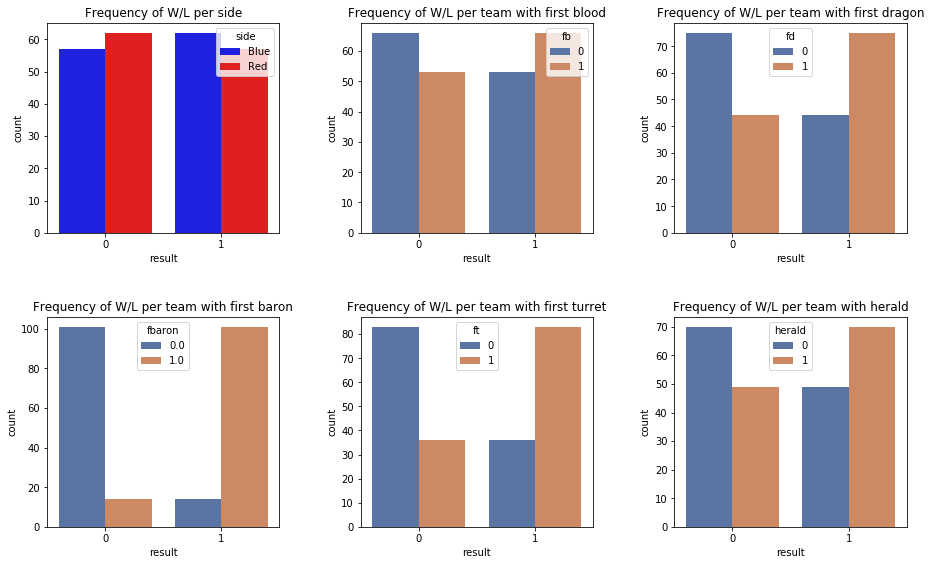

In [17]:
plt.subplot(231)
sns.countplot(x='result',hue='side',data=team_data_corr,palette= ['blue','red'])
plt.title('Frequency of W/L per side')

plt.subplot(232)
sns.countplot(x='result',hue='fb',data=team_data_corr,palette= 'deep')
plt.title('Frequency of W/L per team with first blood')

plt.subplot(233)
sns.countplot(x='result',hue='fd',data=team_data_corr,palette= 'deep')
plt.title('Frequency of W/L per team with first dragon')

plt.subplot(234)
sns.countplot(x='result',hue='fbaron',data=team_data_corr,palette= 'deep')
plt.title('Frequency of W/L per team with first baron')

plt.subplot(235)
sns.countplot(x='result',hue='ft',data=team_data_corr,palette= 'deep')
plt.title('Frequency of W/L per team with first turret')

plt.subplot(236)
sns.countplot(x='result',hue='herald',data=team_data_corr,palette= 'deep')
plt.title('Frequency of W/L per team with herald')

plt.subplots_adjust(top=2, bottom=0.25, left=0.01, right=2, hspace=0.4, wspace=0.35)

From these results, it is as expected that the side of the map affects the result of a victory or loss very little. It is evenly distributed, and offset by a little, likely due to the low number of matches (119).  
  
The other bar charts are as expected, but the chart with the first baron variable shows the most significant effect. From this, we can see that having first baron greatly increases the chance of victory. This is likely due to how effective having the baron buff is, resulting in many towers destroyed and eventually the nexus.  
  
Furthermore, the team which destroys the first turret first also seems to be more likely to win. This is unexpected, since the first turret being destroyed does not seem to have too much of an impact. Perhaps it is the gold bonus, morale boost, or a synchronised herald push as a result, that contributes to other factors into a victory.

### Pairwise relationships

Now that we have seen the effect of variables on a win loss, we can now investigate other aspects.  
  
We look at whether there are any pairwise relationships between the continuous variables, using a heatmap.

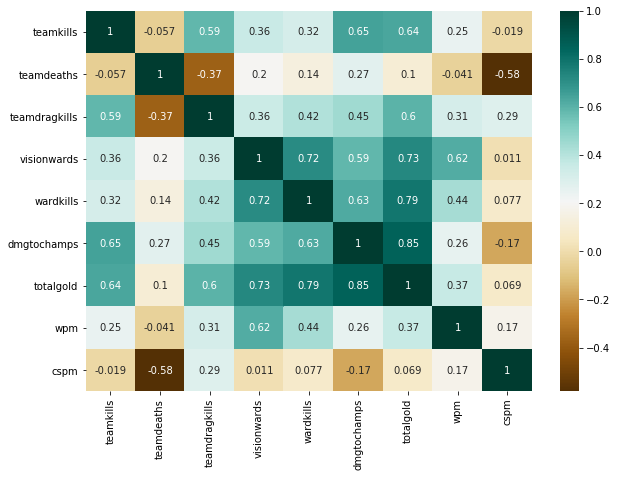

In [18]:
team_data_heat = team_data[['teamkills','teamdeaths','teamdragkills','visionwards','wardkills','dmgtochamps','totalgold','wpm','cspm']]
plt.figure(figsize=(10,7))
sns.heatmap(team_data_heat.corr(),cmap="BrBG",annot=True)



This heatmaps indicates the relationship between the 9 variables chosen.  
  
'teamdeaths' and 'cspm' have a negative relationship, which is as expected, since farming creeps consistently at such a high count implies less teamfighting. This means less team deaths. The low value between 'cspm' and 'teamkills' supports this idea of less teamfighting, since if there was more teamfighting, this value would be greater.  

The other relationships with a large coefficient are mostly as expected, such as with 'dmgtochamps' and 'totalgold'. This is because a higher damage to champions implies more teamkills, and therefore more gold.  

Other relationships to note are that 'wpm' and 'teamkills' being somewhat positive, along with 'wardkills' and 'teamkills' and 'visionwards' and 'teamkills'. This implies that having stronger vision control results in a greater number of kills.

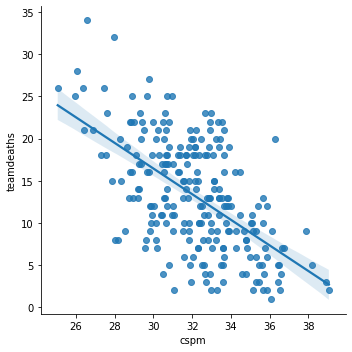

In [19]:
sns.lmplot(x='cspm',y='teamdeaths',data=team_data_heat,fit_reg=True)

This relationship with a -0.58 coefficient shows a distribution that is fairly negatively correlated. This regression line, however, is just used to hint this negative relationship (the line does not seem fit the data very well and therefore is not representative of it).

## 5. Conclusion



In general, many of the relationships found were as expected, except for some findings. The interesting relationships are the the "first turret" and "result" relationship, and the overall vision control relationships.  

We had restricted our analysis to team statistics for this report. One of the main reasons were that a lot of individual player statistics are redily available online, and are largely known. This is also the case with the champions played, having their pick rate, ban rate, and win rate analysed. So, by focusing on team statistics, we were able to find more interesting and lesser known results.  

One limitation of our findings was that since there only 119 games recorded during this LCS 2019 tourney, the relationships discovered are not reliable, due to the low sample size.  

Another limitation, yet less significant, is the patch no. of this game (9.19). This means that the relationships found may be affected by this specific patch, but it is likely that it does not affect this much.

The implications of our found relationships are mainly only applicable to pro play, and hence, not applicable to games in general. This is due to the games being only from a world championship level. 